In [67]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import skimage

In [68]:
img = cv.imread('foreground/fg-8.jpg')
orignal_mask = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [69]:
binary_mask = cv.adaptiveThreshold(
    orignal_mask, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)


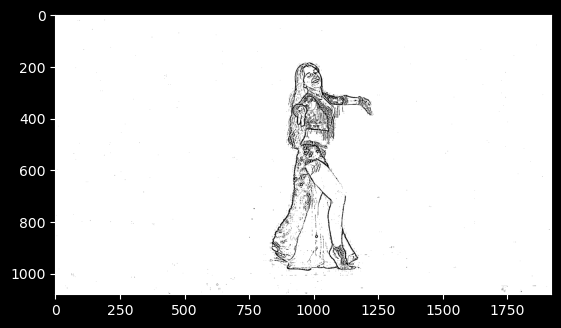

In [70]:
plt.imshow(binary_mask, cmap='gray')

In [71]:
binary_mask = cv.bitwise_not(binary_mask)

In [72]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 37, 10, 25)

In [73]:
binary_mask = skimage.morphology.opening(binary_mask, np.ones((3, 3)))

In [74]:
# binary_mask = cv.erode(binary_mask, (21,21), iterations=3)
# binary_mask = cv.erode(binary_mask, (15,15), iterations=1)

In [75]:
# cv.fastNlMeansDenoising(binary_mask, binary_mask, 3, 7, 5)


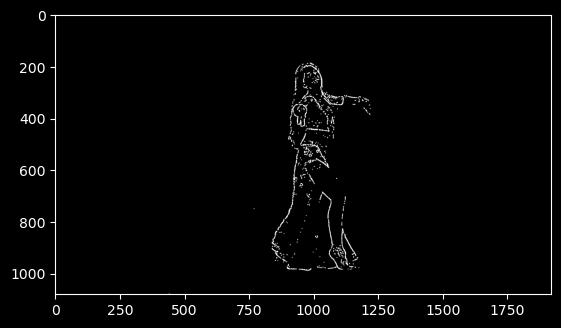

In [76]:
plt.imshow(binary_mask, cmap='gray')


In [77]:
binary_mask = cv.bitwise_not(binary_mask)

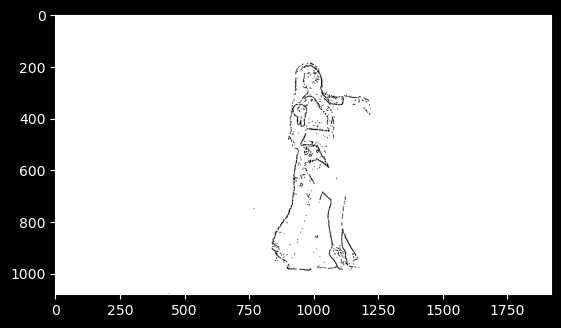

In [78]:
plt.imshow(binary_mask, cmap='gray')

In [79]:
height, width, _ = img.shape
left_margin_proportion = 0.3
right_margin_proportion = 0.3
up_margin_proportion = 0.1
down_margin_proportion = 0.1

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)


In [80]:
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)


In [81]:
mask = np.zeros((height, width), np.uint8)
mask[:] = cv.GC_PR_BGD
mask[binary_mask == 0] = cv.GC_FGD

In [82]:
cv.grabCut(
    img,
    mask,
    boundary_rectangle,
    background_model,
    foreground_model,
    5,
    cv.GC_INIT_WITH_MASK,
)


(array([[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]], dtype=uint8),
 array([[ 3.39304054e-01,  0.00000000e+00,  3.93057178e-01,
          2.65392857e-01,  2.24591027e-03,  7.67695736e+01,
          1.16872870e+02,  6.65687932e+01,  2.96367936e+01,
          3.19587580e+01,  2.99555506e+01,  6.64200080e+01,
          1.08479865e+02,  5.57650373e+01,  8.53489255e+01,
          1.28850162e+02,  6.94394197e+01,  8.75248900e+01,
          1.12798101e+02,  8.71727252e+01,  7.12553996e+00,
          6.61270541e+00,  3.01561039e+00,  6.61270541e+00,
          1.33525451e+01, -3.80755291e+00,  3.01561039e+00,
         -3.80755291e+00,  1.77988392e+01,  2.29001776e+01,
          2.93484711e+01,  2.78001898e+01,  2.93484711e+01,
          4.75439861e+01,  3.82509645e+01,  2.78001898e+01,
          3.82509645e+01,  4.32647668e+01,  2.14105733

In [83]:
grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype(
    "uint8"
)


In [84]:
segmented_image = img.copy() * grabcut_mask[:, :, np.newaxis]

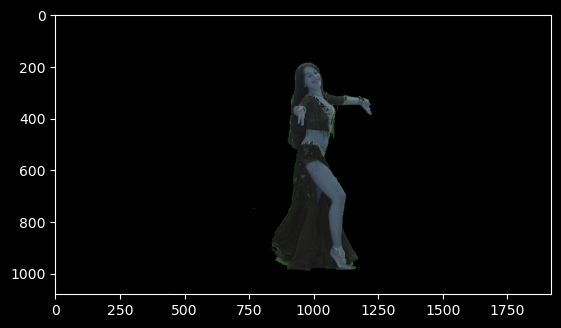

In [85]:
plt.imshow(segmented_image)

In [86]:
bg = cv.imread('background/bg-1.jpg')
bg = cv.resize(bg, (width, height),fx=0,fy=0, interpolation = cv.INTER_CUBIC)

In [87]:
segmented_bg = bg.copy() * (1 - grabcut_mask[:, :, np.newaxis])

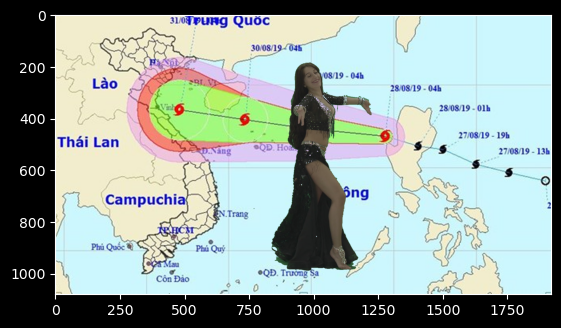

In [88]:
newimg = segmented_image + segmented_bg
newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
plt.imshow(newimg)